**<h1>Business Understanding</h1>**

**<h3>Problem</h3>**

The problem that we aim to solve is the accurate forecasting of a movie's success based on various features like cast, crew, budget, revenue, release dates, and more. This solution is significant because it allows movie studios and production companies to make informed decisions, optimize investments, mitigate risks, and enhance audience satisfaction by predicting a movie's success accurately. Solving this problem is crucial as it enables efficient resource management, better project selection, and improved marketing strategies within the entertainment industry. By contributing a predictive model that leverages data-driven insights, this approach can drive greater profitability and audience engagement. The results obtained from this predictive model can be viably used to guide decision-making processes related to movie production, marketing strategies, and resource allocation in the entertainment industry.

**<h3> Dataset </h3>**

We are using a dataset from Kaggle titled "Millions of Movies." It is an excellent resource for movie analysis and prediction due to its comprehensive coverage and dynamic nature. It encompasses about a million movies, spanning from the 1900s to the present day, providing a rich historical context and a wide variety of data points for analysis. The dataset includes detailed information on cast, crew, plot keywords, budget, revenue, posters, release dates, and languages, which are crucial factors in predicting a movie's success. Additionally, its daily updates and enrichment with TMDB API ensure that the dataset remains current and reflective of the latest trends and releases in the movie industry. This level of detail and breadth makes it a valuable asset for building accurate and robust predictive models that can help studios and production companies make informed decisions

The dataset includes a blend of nominal and numeric features, such as movie ID, title, language, budget, languages, genres, production company, revenue and detailed information on cast and crew. It encompass a wide range of movies, providing a rich source of data for analysis. The inclusion of both quantitative data (e.g., budget, revenue) and qualitative data (e.g., plot keywords, genres) allows for a comprehensive approach to predicting movie success. This combination of breadth, depth, and timeliness makes it a valuable resource for developing a predictive model of movie success, as it captures a wide array of factors that can influence a movie's performance in the market.

Link to the dataset: <link>https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies</link>

**<h3> Proposed Analytic Solution </h3>**

The proposed solution is the development of a machine learning-based model to predict the success of movies before their release. This solution is significant because it addresses the challenge of uncertainty in the movie industry by providing a data-driven approach to forecast profitability, which is crucial for making informed investment decisions. It can help studios and production companies to optimize their investments, reduce financial risks, and tailor marketing strategies to enhance audience satisfaction. By accurately predicting movie success, the model can contribute to the bigger picture by improving the efficiency of resource allocation, project selection, and marketing efforts in the entertainment industry. The results of the model can be used to guide decision-making processes at various stages of movie production and distribution

**<h1>Data Understanding and Exploration</h1>**

**<h3>1. Dataset Filtering</h3>**

The first step in the data understanding phase is to check for the availabilty of the target feature. Based on the proposed solution, the target feature should accurately measure the success of the movie. For that, we decided to derive our target feature which will be the ratio of the revenue and budget. Consequently, if the ratio obtained is greater than 2, meaning if the movie makes twice as much as its net cost of production, it would be considered a success. We plan to utilize 3 levels of success indicators low, medium and high as per the ratio.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('movies.csv',sep=r',', skipinitialspace=True)
df.head(20)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
5,385687,Fast X,Action-Crime-Thriller,en,Over many missions and against impossible odds...,3583.861,Universal Pictures-Original Film-One Race-Perf...,2023-05-17,340000000.0,704709660.0,142.0,Released,The end of the road begins.,7.275,3694.0,Vin Diesel-Michelle Rodriguez-Tyrese Gibson-Lu...,sequel-revenge-racing-family-cliffhanger-cars,/fiVW06jE7z9YnO4trhaMEdclSiC.jpg,/4XM8DUTQb3lhLemJC51Jx4a2EuA.jpg,19603-445954-781009-603692-697843-502356-29861...
6,614479,Insidious: The Red Door,Horror-Mystery-Thriller,en,To put their demons to rest once and for all J...,3512.648,Blumhouse Productions-Stage 6 Films-Screen Gem...,2023-07-05,16000000.0,175582093.0,107.0,Released,It ends where it all began.,6.750,564.0,Ty Simpkins-Patrick Wilson-Sinclair Daniel-Ros...,sequel-demon-franchise-insidious-supernatural ...,/azTC5osYiqei1ofw6Z3GmUrxQbi.jpg,/i2GVEvltEu3BXn5crBSxgKuTaca.jpg,681435-644937-448085-980848-1101547-988355-561...
7,646389,Plane,Action-Adventure-Thriller,en,After a heroic job of successfully landing his...,2618.646,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,2023-01-12,25000000.0,51000000.0,107.0,Released,Survive together or die alone.,6.901,785.0,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,/9Rq14Eyrf7Tu1xk0Pl7VcNbNh1n.jpg,505642-758769-864692-631842-1058949-925943-758...
8,569094,Spider-Man: Across the

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722480 entries, 0 to 722479
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722480 non-null  int64  
 1   title                 722474 non-null  object 
 2   genres                511978 non-null  object 
 3   original_language     722480 non-null  object 
 4   overview              604113 non-null  object 
 5   popularity            722480 non-null  float64
 6   production_companies  337256 non-null  object 
 7   release_date          670592 non-null  object 
 8   budget                722480 non-null  float64
 9   revenue               722480 non-null  float64
 10  runtime               688110 non-null  float64
 11  status                722480 non-null  object 
 12  tagline               108313 non-null  object 
 13  vote_average          722480 non-null  float64
 14  vote_count            722480 non-null  float64
 15  

In [4]:
num_zeros = ((df['budget'] != 0) & (df['revenue'] != 0)).sum()
num_zeros

11190

We observe that the budget and revenue parameters combined, are only present for a total of 11190 records out of the total. Hence, we proceed with further data exploration on the filtered dataset where both the parameters are present.

In [5]:
nonzero_df = df[(df['budget'] != 0) & (df['revenue'] != 0)]

#saving the filtered dataset into a csv file
nonzero_df.to_csv('movies_filtered.csv', index=False)

In [6]:
#deleting the unfiltered dataframe and loading the newly created one
del df
df = pd.read_csv('movies_filtered.csv',sep=r',', skipinitialspace=True)
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11190 entries, 0 to 11189
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11190 non-null  int64  
 1   title                 11190 non-null  object 
 2   genres                10692 non-null  object 
 3   original_language     11190 non-null  object 
 4   overview              10820 non-null  object 
 5   popularity            11190 non-null  float64
 6   production_companies  10060 non-null  object 
 7   release_date          10747 non-null  object 
 8   budget                11190 non-null  float64
 9   revenue               11190 non-null  float64
 10  runtime               11143 non-null  float64
 11  status                11190 non-null  object 
 12  tagline               8449 non-null   object 
 13  vote_average          11190 non-null  float64
 14  vote_count            11190 non-null  float64
 15  credits            

In [8]:
df['revenue_budget_ratio'] = df['revenue'] / df['budget']
#Checking central tendencies for the derived feature
mean_ratio = df['revenue_budget_ratio'].mean()
median_ratio = df['revenue_budget_ratio'].median()
range_ratio = df['revenue_budget_ratio'].max() - df['revenue_budget_ratio'].min()

print("Mean of revenue_budget_ratio:", mean_ratio)
print("Median of revenue_budget_ratio:", median_ratio)
print("Range of revenue_budget_ratio:", range_ratio)

Mean of revenue_budget_ratio: 25066.423088188672
Median of revenue_budget_ratio: 1.75
Range of revenue_budget_ratio: 100004216.0


The mean is evidently quite high than the median. The central tendencies are breaking probably because of outliers.

In [9]:
s_df = df.sort_values(by='revenue_budget_ratio', ascending=False)
s_df.head()


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,revenue_budget_ratio
10260,932428,Żyraf: Czas Zemsty,Horror,pl,NaN,0.6,NaN,NaN,1.0,100004215.0,...,Released,NaN,8.0,1.0,Fabian Żygadło-Antek Kaminski-Kacper Podczasia...,NaN,/1oGhKAwgzcQtOsA5nXZDzo7dhUL.jpg,/iyIxtg6EFEtKI3wNEhXs9ppP1Zb.jpg,NaN,100004215.0
10291,888201,GRU VS BOBUX MAN,NaN,en,NaN,0.6,NaN,NaN,1.0,90000000.0,...,Released,NaN,10.0,1.0,kakav420-kraccbak,NaN,NaN,/goC4BL2ae4YYTP8SHd3Yo6jIdgd.jpg,NaN,90000000.0
10006,698480,Amizade Desfeita,NaN,en,Blaire Mitch Jess Adam Ken and Val are in a ch...,0.6,NaN,NaN,1.0,64056643.0,...,Released,NaN,0.0,0.0,Blaire lily,NaN,NaN,NaN,NaN,64056643.0
9970,737626,A Isca e o Anzol,NaN,pt,NaN,0.6,NaN,NaN,1.0,9999999.0,...,Released,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9999999.0
10689,535928,Wooden Slippers (2007),NaN,tl,The best movie of 2007,0.6,NaN,NaN,100.0,500000000.0,...,Released,Oh nang gewa mu?,10.0,1.0,NaN,NaN,/ejtnZGYX8NnQUHFMsPWqPtliFff.jpg,NaN,NaN,5000000.0


**<h3>Identifying the Data Scales, Data Types and Data domain for the features</h3>**

In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    

Unique values in id: [615656 758323 667538 ... 512178 506977 501079]
Unique values in title: ['Meg 2: The Trench' "The Pope's Exorcist"
 'Transformers: Rise of the Beasts' ...
 '10 INSANE World Records OF ALL TIME' '100W Bulb' 'Chanel']
Unique values in genres: ['Action-Science Fiction-Horror' 'Horror-Mystery-Thriller'
 'Action-Adventure-Science Fiction' ... 'Thriller-Animation'
 'Animation-Fantasy-Comedy' 'Drama-Fantasy-Comedy']
Unique values in original_language: ['en' 'fi' 'ja' 'fr' 'es' 'zh' 'cn' 'hi' 'ko' 'te' 'ru' 'pt' 'it' 'de'
 'th' 'no' 'id' 'ar' 'da' 'nb' 'sv' 'tl' 'cs' 'el' 'pl' 'fa' 'uk' 'kn'
 'ro' 'he' 'ms' 'tr' 'ta' 'nl' 'hu' 'ml' 'vi' 'et' 'ca' 'af' 'ur' 'gl'
 'ku' 'bn' 'iu' 'sr' 'mr' 'sk' 'bm' 'pa' 'ne' 'gu' 'lt' 'az' 'si' 'km'
 'dz' 'xx' 'jv' 'ka' 'bg' 'am' 'ab' 'ht' 'dv' 'bs' 'sq' 'or' 'mn' 'lv'
 'lg' 'mo']
Unique values in overview: ['An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operati

In [11]:
features_df = pd.DataFrame(columns=['col_name', 'desc', 'data_type', 'scale(N,O,I,R)', 'domain', 'missing_values'])

# Iterate through columns of the original DataFrame and populate the column information DataFrame
for col in df.columns:
    col_info = {
        'col_name': col,
        'desc': '',  # Add description if available
        'data_type': df[col].dtype,
        'scale(N,O,I,R)': '',  
        'domain': df[col].unique(),  # Add domain if available
        'missing_values': df[col].isnull().sum()
    }
    features_df = pd.concat([features_df, pd.DataFrame([col_info])], ignore_index=True)
    
#Setting the data types
features_df.loc[features_df['data_type'] == 'object', 'data_type'] = 'String'
features_df.loc[features_df['col_name'] == 'release_date', 'data_type'] = 'Date'
features_df

#Setting the data scale
## ---------------data scale col---------------------------
scales = ['N', 'N', 'N', 'N', 'N', 'I', 'N', 'I', 'R', 'R', 'R', 'N', 'N', 'R', 'R', 'N', 'N', 'N', 'N', 'N','R']
features_df['scale(N,O,I,R)'] = scales
# N, O, I, R are Nominal, Ordinal, Interval, Ratio


#Setting the descriptions
## ---------------description col---------------------------
col_descriptions = {
    'id': 'Unique identifier for the movie',
    'title': 'Title of the movie',
    'genres': 'Genres associated with the movie',
    'original_language': 'Original language of the movie',
    'overview': 'Brief description of the movie',
    'popularity': 'TMDB lifetime popularity score',
    'production_companies': 'Companies involved in the production',
    'release_date': 'Date the movie was released',
    'budget': 'Amount of money spent to produce the movie',
    'revenue': 'Amount of money the movie generated',
    'runtime': 'Duration of the movie in minutes',
    'status': 'Current status of the movie (e.g., released, in production)',
    'tagline': 'Short phrase that captures the essence of the movie',
    'vote_average': 'Average user rating of the movie',
    'vote_count': 'Number of user ratings for the movie',
    'credits': 'Information about the cast and crew of the movie',
    'keywords': 'Keywords associated with the movie',
    'poster_path': 'File path for the movie poster image',
    'backdrop_path': 'File path for the movie backdrop image',
    'recommendations': 'Other movies recommended based on this one',
    'revenue_budget_ratio': 'Ratio of the movie\'s revenue to its budget'
}
features_df['desc'] = features_df['col_name'].map(col_descriptions)
features_df

,col_name,desc,data_type,"scale(N,O,I,R)",domain,missing_values
0,id,Unique identifier for the movie,int64,N,"[615656, 758323, 667538, 640146, 677179, 38568...",0
1,title,Title of the movie,String,N,"[Meg 2: The Trench, The Pope's Exorcist, Trans...",0
2,genres,Genres associated with the movie,String,N,"[Action-Science Fiction-Horror, Horror-Mystery...",498
3,original_language,Original language of the movie,String,N,"[en, fi, ja, fr, es, zh, cn, hi, ko, te, ru, p...",0
4,overview,Brief description of the movie,String,N,[An exploratory dive into the deepest depths o...,370
5,popularity,TMDB lifetime popularity score,float64,I,"[8763.998, 5953.227, 5409.104, 4425.387, 3994....",0
6,production_companies,Companies involved in the production,String,N,[Apelles Entertainment-Warner Bros. Pictures-d...,1130
7,release_date,Date the movie was released,Date,I,"[2023-08-02, 2023-04-05, 2023-06-06, 2023-02-1...",443
8,budget,Amount of money spent to produce the movie,float64,R,"[129000000.0, 18000000.0, 200000000.0, 7500000...",0
9,revenue,Amount of money the movie generated,float64,R,"[352056482.0, 65675816.0, 407045464.0, 4757662...",0


**<h3>2. Data Quality Report</h3>**

In [12]:
# FOR CONTINUOUS FEATURES
def percentage_missing(series):
    return (series.isna().sum() / len(series)) * 100

def calculate_quartiles(series):
    return series.quantile([0.25, 0.5, 0.75])
    
#For continuous features
cont_stats = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        feature_stats = {
            'Feature': column,
            'Desc': col_descriptions[column],
            'Count': df[column].count(),
            '% of Missing': percentage_missing(df[column]),
            'Card.': df[column].nunique(),
            'Min.': df[column].min(),
            'Q1': calculate_quartiles(df[column])[0.25],
            'Median': calculate_quartiles(df[column])[0.5],
            'Q3': calculate_quartiles(df[column])[0.75],
            'Max.': df[column].max(),
            'Mean': df[column].mean(),
            'Std. Dev.': df[column].std(),
            'Notes': ''
        }
        cont_stats.append(feature_stats)


cont_features_df = pd.DataFrame(cont_stats)

# Rounding numeric columns to two decimal places
numeric_cols = ['Count', '% of Missing', 'Card.', 'Min.', 'Q1', 'Median', 'Q3', 'Max.', 'Mean', 'Std. Dev.']
cont_features_df[numeric_cols] = cont_features_df[numeric_cols].round(2)

print(cont_features_df)

                Feature                                        Desc  Count  \
0                    id             Unique identifier for the movie  11190   
1            popularity              TMDB lifetime popularity score  11190   
2                budget  Amount of money spent to produce the movie  11190   
3               revenue         Amount of money the movie generated  11190   
4               runtime            Duration of the movie in minutes  11143   
5          vote_average            Average user rating of the movie  11190   
6            vote_count        Number of user ratings for the movie  11190   
7  revenue_budget_ratio  Ratio of the movie's revenue to its budget  11190   

   % of Missing  Card.  Min.         Q1      Median           Q3  \
0          0.00  10824   5.0   11547.25    60187.50    426513.75   
1          0.00   8276   0.6       2.62       10.47        19.54   
2          0.00   1832   1.0  740854.00  7000000.00  25000000.00   
3          0.00   8370 -1

In [13]:
#FOR CATEGORICAL FEATURES

def second_mode(series):
    counts = series.value_counts()
    if len(counts) > 1:
        return counts.index[1]
    else:
        return None

def second_mode_freq(series):
    counts = series.value_counts()
    if len(counts) > 1:
        return counts.iloc[1]
    else:
        return None

def second_mode_percent(series):
    counts = series.value_counts(normalize=True)
    if len(counts) > 1:
        return counts.iloc[1] * 100
    else:
        return None


cat_stats = []

for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        feature_stats = {
            'Feature': column,
            'Desc': col_descriptions[column],
            'Count': df[column].count(),
            '% of Missing': percentage_missing(df[column]),
            'Card.': df[column].nunique(),
            'Mode': df[column].mode().iloc[0],
            'Mode Freq.': df[column].value_counts().max(),
            'Mode %': (df[column].value_counts().max() / df[column].count()) * 100,
            '2nd Mode': second_mode(df[column]),
            '2nd Mode Freq.': second_mode_freq(df[column]),
            '2nd Mode Perc': second_mode_percent(df[column]),
            'Notes': ''
        }
        cat_stats.append(feature_stats)
        
cat_df = pd.DataFrame(cat_stats)

# Rounding numeric columns to two decimal places
numeric_cols = ['% of Missing', 'Card.', 'Mode Freq.','Mode %','2nd Mode Freq.', '2nd Mode Perc']
cat_df[numeric_cols] = cat_df[numeric_cols].round(2)

print(cat_df)

                 Feature                                               Desc  \
0                  title                                 Title of the movie   
1                 genres                   Genres associated with the movie   
2      original_language                     Original language of the movie   
3               overview                     Brief description of the movie   
4   production_companies               Companies involved in the production   
5           release_date                        Date the movie was released   
6                 status  Current status of the movie (e.g., released, i...   
7                tagline  Short phrase that captures the essence of the ...   
8                credits   Information about the cast and crew of the movie   
9               keywords                 Keywords associated with the movie   
10           poster_path               File path for the movie poster image   
11         backdrop_path             File path for t

**<h3>3. Visualizations</h3>**

**<h4>A) Categorical Features</h4>**

Only some categorical features are fit to be displayed in the bar plots due to a variety of reasons such as:
1. Very high cardinality for a few features such as title, credits etc.
2. Irrelevant information such as poster path, title, etc

We dealt with the release date feature by extracting out the year and then binning it into 5-year intervals. 'Genres' also had high cardinality, but since its is relevant feature, we just account for the top 30 genres that occur in the data

In [14]:
import matplotlib.pyplot as plt

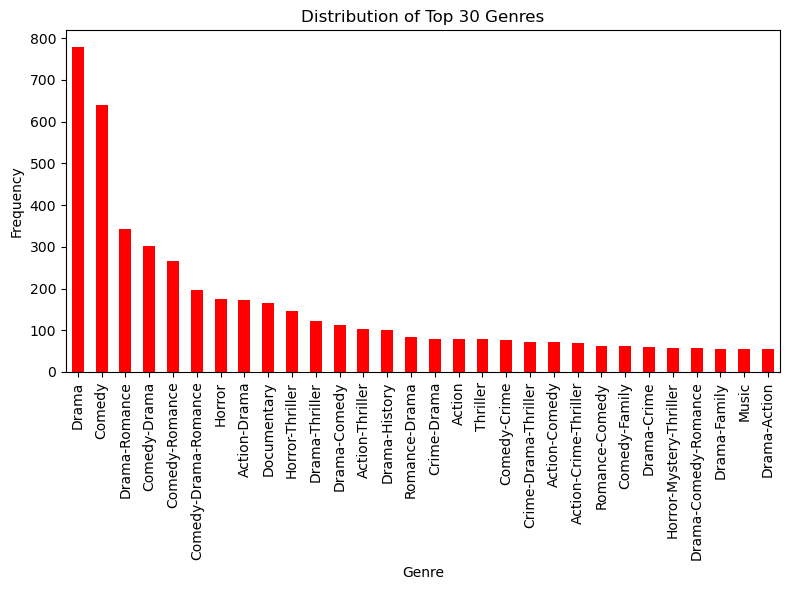

In [37]:
genre_counts = df['genres'].str.split(',').explode().value_counts()

# Get the top 30 genres
top_genres = genre_counts.nlargest(30).index

# Create the barplot
fig, ax = plt.subplots(figsize=(8, 6))
genre_counts[top_genres].plot(kind='bar', color='red', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Top 30 Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()

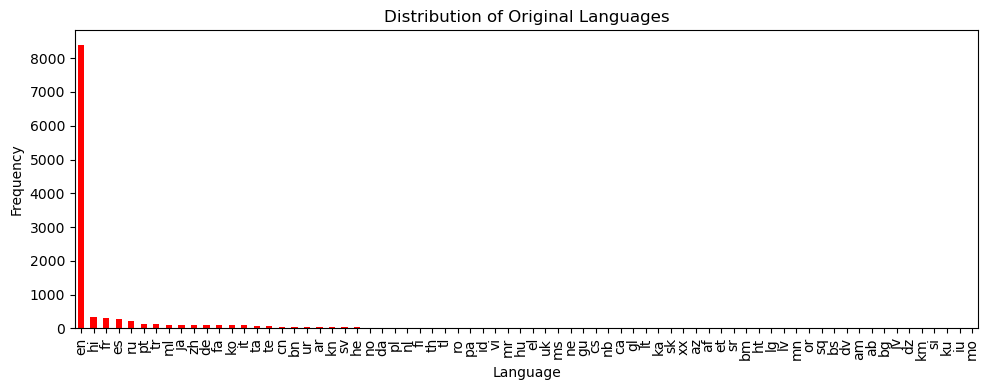

In [35]:
# Get the value counts for the 'original_language' column
lang_counts = df['original_language'].value_counts()

# Create the barplot
fig, ax = plt.subplots(figsize=(10, 4))
lang_counts.plot(kind='bar', color='red', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Original Languages')
ax.set_xlabel('Language')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()

/var/folders/_8/n7gm5dlx7tn_vjtzky_5rjjr0000gn/T/ipykernel_39838/1702724016.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


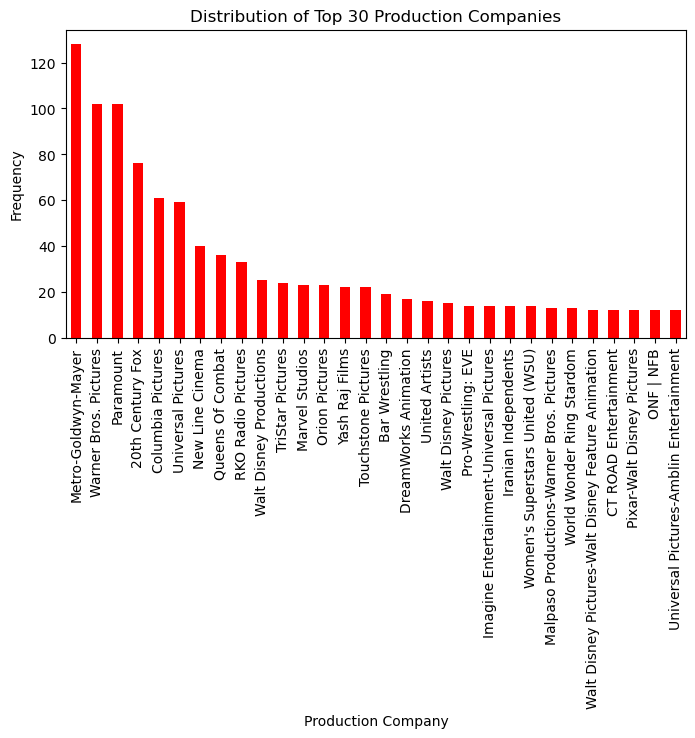

In [33]:
pc_counts = df['production_companies'].str.split(',').explode().value_counts()

# Get the top 30 production companies
top_pc = pc_counts.nlargest(30).index

# Create the barplot
fig, ax = plt.subplots(figsize=(8, 4))
pc_counts[top_pc].plot(kind='bar', color='red', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Top 30 Production Companies')
ax.set_xlabel('Production Company')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=90)



plt.show()

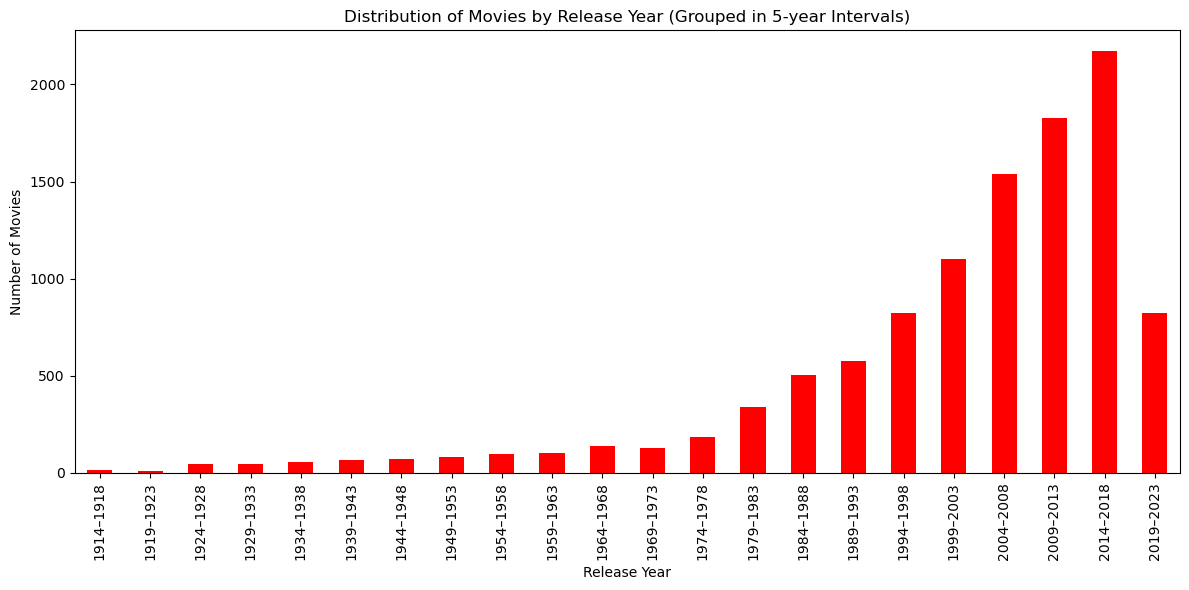

In [39]:
# Assuming your DataFrame is named 'df' and has a 'release_date' column
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Define the start and end years, and the interval
start_year = 1914
end_year = 2024
interval = 5

# Create the bins for the year ranges
bins = list(range(start_year, end_year + 1, interval))
labels = [f"{start}–{start + interval - 1}" for start in bins[:-1]]

# Categorize the years into the bins
df['release_year_group'] = pd.cut(df['release_year'], bins=bins, labels=labels, include_lowest=True)

# Get the count of movies per release year group
year_group_counts = df['release_year_group'].value_counts().sort_index()

# Create the barplot
fig, ax = plt.subplots(figsize=(12, 6))
year_group_counts.plot(kind='bar', color='red', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Movies by Release Year (Grouped in 5-year Intervals)')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Movies')
ax.tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()



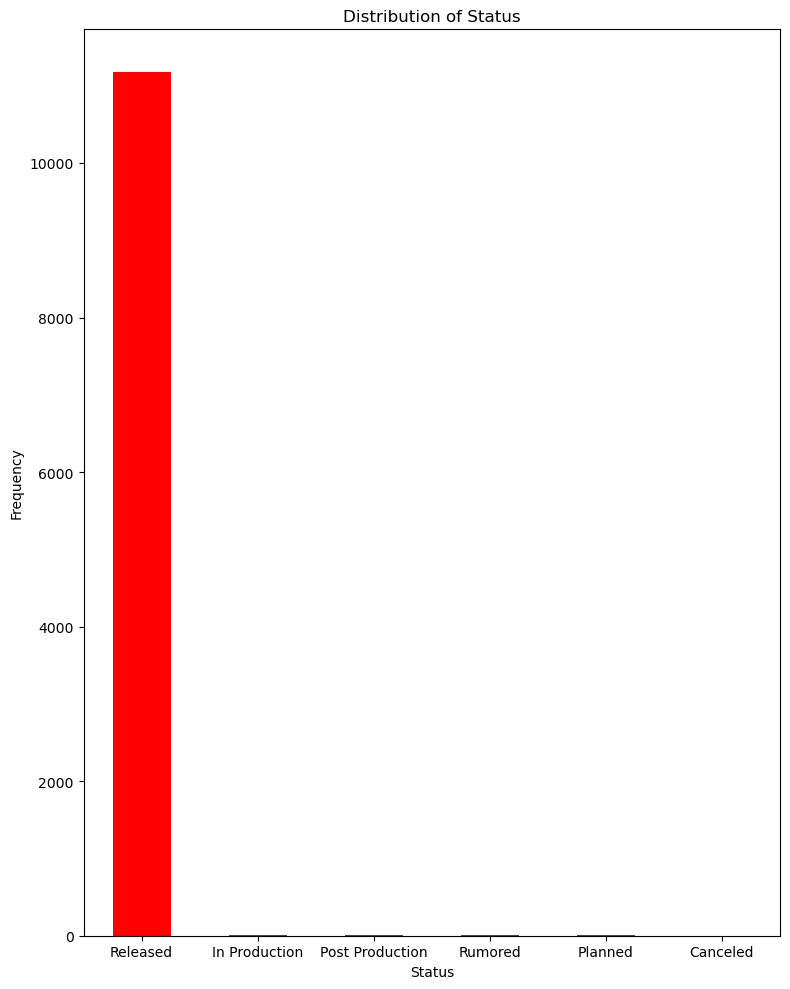

In [53]:
# Get the value counts for the 'status' column
st_counts = df['status'].value_counts()

# Create the barplot
fig, ax = plt.subplots(figsize=(8, 10))
st_counts.plot(kind='bar', color='red', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Status')
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation = 0)

# Adjust the layout
plt.tight_layout()
plt.show()

**<h4>B) Continuous Features</h4>**

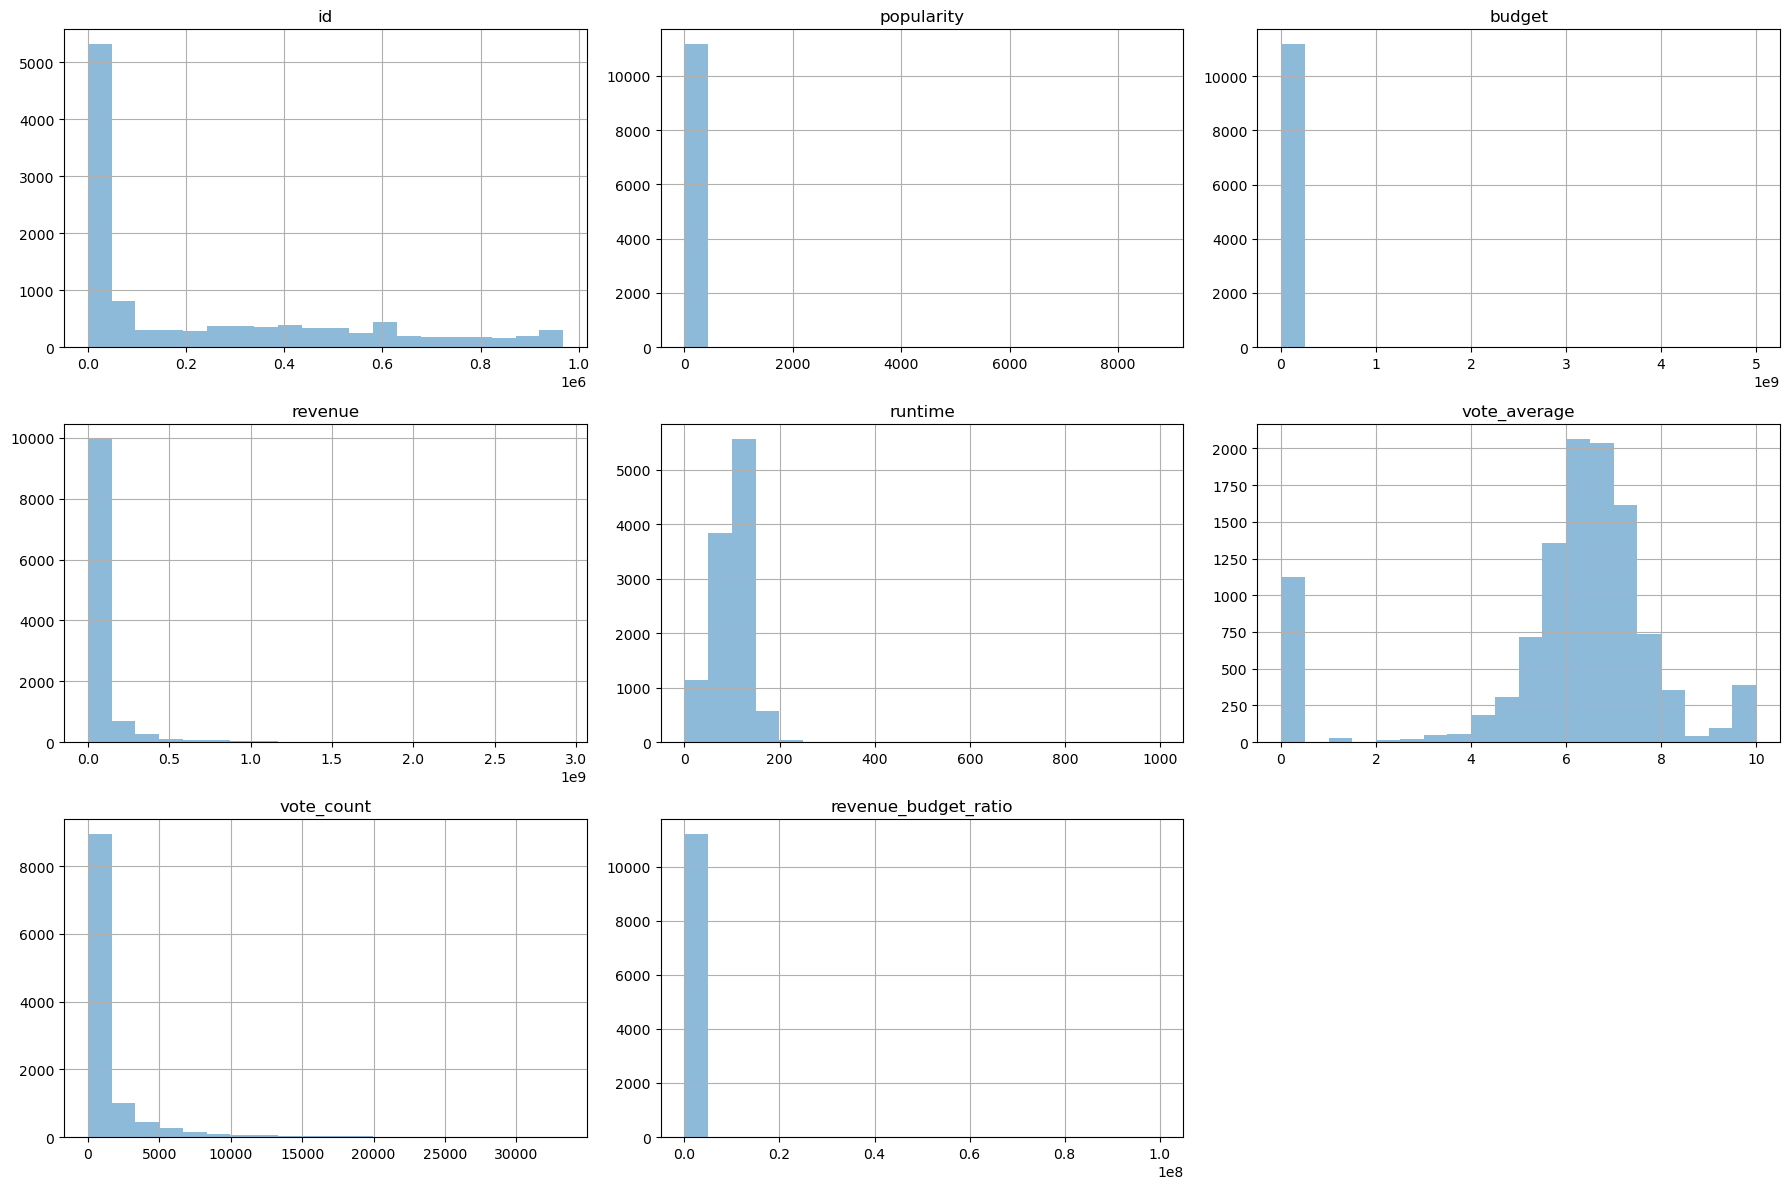

In [30]:
continuous_vars = df.select_dtypes(exclude='object').columns

# Calculate the no. of rows and columns needed
num_vars = len(continuous_vars)
num_cols = 3 # No. of histograms per row
num_rows = (num_vars + num_cols - 1) // num_cols  # no. of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
axes = axes.flatten()
for i, var in enumerate(continuous_vars):
    df[var].hist(ax=axes[i], bins=20, alpha=0.5)
    axes[i].set_title(var)

for j in range(num_vars, num_rows * num_cols):
    axes[j].axis('off')
plt.tight_layout()
plt.show()